In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
from pathlib import Path

workding_dir = str(Path.cwd().parent)
os.chdir(workding_dir)
sys.path.append(workding_dir)
print("workding dir:", workding_dir)

workding dir: /Users/inflaton/code/engd/projects/novel-translation


In [3]:
from dotenv import find_dotenv, load_dotenv

found_dotenv = find_dotenv(".env")

if len(found_dotenv) == 0:
    found_dotenv = find_dotenv(".env.example")
print(f"loading env vars from: {found_dotenv}")
load_dotenv(found_dotenv, override=True)

loading env vars from: /Users/inflaton/code/engd/projects/novel-translation/.env


True

In [4]:
from llm_translation.translation_utils import *

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/inflaton/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/inflaton/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/inflaton/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


## Data Processing

In [5]:
import pandas as pd

df = pd.read_csv("results/mac-results.csv")
df.head(2)

,chinese,english,unsloth/Qwen2-0.5B-Instruct,unsloth/Qwen2-0.5B-Instruct(finetuned),unsloth/Qwen2-1.5B-Instruct,unsloth/Qwen2-1.5B-Instruct(finetuned),unsloth/Qwen2-0.5B-Instruct-bnb-4bit,unsloth/Qwen2-0.5B-Instruct-bnb-4bit(finetuned),unsloth/Qwen2-1.5B-Instruct-bnb-4bit,unsloth/Qwen2-1.5B-Instruct-bnb-4bit(finetuned),unsloth/Qwen2-7B-Instruct,unsloth/Qwen2-7B-Instruct(finetuned),unsloth/Qwen2-7B-Instruct-bnb-4bit,unsloth/Qwen2-7B-Instruct-bnb-4bit(finetuned)
0,老耿端起枪，眯缝起一只三角眼，一搂扳机响了枪，冰雹般的金麻雀劈哩啪啦往下落，铁砂子在柳枝间飞...,"Old Geng picked up his shotgun, squinted, and ...","Old Tang held his gun, squinting his eyes with...",Old Geng lifted his rifle and narrowed his eye...,"Old Geng took up his gun, squinted one of its ...","Old Geng raised the rifle, squeezed one tiny t...",Old Teng raised his gun and looked up at a pai...,"Old Geng raised his rifle, squinted his eyes, ...",Old耿拿起枪，眯着眼睛一搂扳机就响了枪，金麻雀噼里啪啦的往下掉，铁砂子在柳枝间飞溅，发出“...,"Old Geng raised his pistol, squinted, and fire...","Old Aigang raised his rifle, squinting one of ...",Old Geng raised his rifle and squinted into th...,"Old Geng raised his gun, squinting one of his ...",Old Geng raised his rifle and squinted into th...
1,次日天未明时，刘老老便起来梳洗了， 又将板儿教了几句话； 五六岁的孩子，听见带了他进城逛去，...,Next day Grannie Liu was up before dawn. As so...,"The next morning when it was still dark, Liu G...",It was still not light when this little update...,"By the time the next day dawned, Liu Lao got u...","Having been woken just before daybreak, Granni...","The next day at dawn, Liu Geowon got up early ...","Three or four hours before this, Grannie Liu h...","At dawn the next day, Liu Langlang got up to b...","But by some miracle of preparation, Grannie Li...","The next morning, before dawn, Old Liu rose to...",First thing next morning Grannie Liu rose befo...,"The next morning, before dawn, Old Liu rose to...",First thing in the morning Grannie Liu rose an...


In [6]:
df.columns.to_list()

['chinese',
 'english',
 'unsloth/Qwen2-0.5B-Instruct',
 'unsloth/Qwen2-0.5B-Instruct(finetuned)',
 'unsloth/Qwen2-1.5B-Instruct',
 'unsloth/Qwen2-1.5B-Instruct(finetuned)',
 'unsloth/Qwen2-0.5B-Instruct-bnb-4bit',
 'unsloth/Qwen2-0.5B-Instruct-bnb-4bit(finetuned)',
 'unsloth/Qwen2-1.5B-Instruct-bnb-4bit',
 'unsloth/Qwen2-1.5B-Instruct-bnb-4bit(finetuned)',
 'unsloth/Qwen2-7B-Instruct',
 'unsloth/Qwen2-7B-Instruct(finetuned)',
 'unsloth/Qwen2-7B-Instruct-bnb-4bit',
 'unsloth/Qwen2-7B-Instruct-bnb-4bit(finetuned)']

In [7]:
df = df[
    [
        "chinese",
        "english",
        "unsloth/Qwen2-0.5B-Instruct",
        "unsloth/Qwen2-0.5B-Instruct-bnb-4bit",
        "unsloth/Qwen2-0.5B-Instruct(finetuned)",
        "unsloth/Qwen2-0.5B-Instruct-bnb-4bit(finetuned)",
        "unsloth/Qwen2-1.5B-Instruct",
        "unsloth/Qwen2-1.5B-Instruct-bnb-4bit",
        "unsloth/Qwen2-1.5B-Instruct(finetuned)",
        "unsloth/Qwen2-1.5B-Instruct-bnb-4bit(finetuned)",
        "unsloth/Qwen2-7B-Instruct",
        "unsloth/Qwen2-7B-Instruct-bnb-4bit",
        "unsloth/Qwen2-7B-Instruct(finetuned)",
        "unsloth/Qwen2-7B-Instruct-bnb-4bit(finetuned)",
    ]
]

In [8]:
df.to_csv("results/experiment-1-results.csv", index=False)

In [9]:
df = pd.read_csv("results/mac-results_v3.csv")
df.head(2)

,chinese,english,unsloth/Qwen2-0.5B-Instruct,unsloth/Qwen2-0.5B-Instruct(finetuned),unsloth/Qwen2-1.5B-Instruct,unsloth/Qwen2-1.5B-Instruct(finetuned),unsloth/Qwen2-0.5B-Instruct-bnb-4bit,unsloth/Qwen2-0.5B-Instruct-bnb-4bit(finetuned),unsloth/Qwen2-1.5B-Instruct-bnb-4bit,unsloth/Qwen2-1.5B-Instruct-bnb-4bit(finetuned),unsloth/Qwen2-7B-Instruct,unsloth/Qwen2-7B-Instruct(finetuned),unsloth/Qwen2-7B-Instruct-bnb-4bit,unsloth/Qwen2-7B-Instruct-bnb-4bit(finetuned),unsloth/mistral-7b-instruct-v0.3,unsloth/mistral-7b-instruct-v0.3(finetuned),gradientai/Llama-3-8B-Instruct-Gradient-1048k,gradientai/Llama-3-8B-Instruct-Gradient-1048k(finetuned)
0,老耿端起枪，眯缝起一只三角眼，一搂扳机响了枪，冰雹般的金麻雀劈哩啪啦往下落，铁砂子在柳枝间飞...,"Old Geng picked up his shotgun, squinted, and ...","Old Tang held his gun, squinting his eyes with...",Old Geng lifted his rifle and narrowed his eye...,"Old Geng took up his gun, squinted one of its ...","Old Geng raised the rifle, squeezed one tiny t...",Old Teng raised his gun and looked up at a pai...,"Old Geng raised his rifle, squinted his eyes, ...",Old耿拿起枪，眯着眼睛一搂扳机就响了枪，金麻雀噼里啪啦的往下掉，铁砂子在柳枝间飞溅，发出“...,"Old Geng raised his pistol, squinted, and fire...","Old Aigang raised his rifle, squinting one of ...",Old Geng raised his rifle and squinted into th...,"Old Geng raised his gun, squinting one of his ...",Old Geng raised his rifle and squinted into th...,"Old Geng raised his gun, squinted through one ...","Old Geng raised his rifle, squinted through on...","Geng Da initiates firing, squinting to form a ...","Old Geng aimed, blinked once, and fired. His s..."
1,次日天未明时，刘老老便起来梳洗了， 又将板儿教了几句话； 五六岁的孩子，听见带了他进城逛去，...,Next day Grannie Liu was up before dawn. As so...,"The next morning when it was still dark, Liu G...",It was still not light when this little update...,"By the time the next day dawned, Liu Lao got u...","Having been woken just before daybreak, Granni...","The next day at dawn, Liu Geowon got up early ...","Three or four hours before this, Grannie Liu h...","At dawn the next day, Liu Langlang got up to b...","But by some miracle of preparation, Grannie Li...","The next morning, before dawn, Old Liu rose to...",First thing next morning Grannie Liu rose befo...,"The next morning, before dawn, Old Liu rose to...",First thing in the morning Grannie Liu rose an...,"The next day, when it was still dark, Liu Lao ...","Next morning, long before daybreak, Grannie Li...","The next day, when it was still dark, Liu Lao ...","As soon as it was daylight, Grannie Liu got up..."


In [10]:
df.columns.to_list()

['chinese',
 'english',
 'unsloth/Qwen2-0.5B-Instruct',
 'unsloth/Qwen2-0.5B-Instruct(finetuned)',
 'unsloth/Qwen2-1.5B-Instruct',
 'unsloth/Qwen2-1.5B-Instruct(finetuned)',
 'unsloth/Qwen2-0.5B-Instruct-bnb-4bit',
 'unsloth/Qwen2-0.5B-Instruct-bnb-4bit(finetuned)',
 'unsloth/Qwen2-1.5B-Instruct-bnb-4bit',
 'unsloth/Qwen2-1.5B-Instruct-bnb-4bit(finetuned)',
 'unsloth/Qwen2-7B-Instruct',
 'unsloth/Qwen2-7B-Instruct(finetuned)',
 'unsloth/Qwen2-7B-Instruct-bnb-4bit',
 'unsloth/Qwen2-7B-Instruct-bnb-4bit(finetuned)',
 'unsloth/mistral-7b-instruct-v0.3',
 'unsloth/mistral-7b-instruct-v0.3(finetuned)',
 'gradientai/Llama-3-8B-Instruct-Gradient-1048k',
 'gradientai/Llama-3-8B-Instruct-Gradient-1048k(finetuned)']

In [11]:
cols = [col for col in df.columns if "bnb-4bit" in col]
cols

['unsloth/Qwen2-0.5B-Instruct-bnb-4bit',
 'unsloth/Qwen2-0.5B-Instruct-bnb-4bit(finetuned)',
 'unsloth/Qwen2-1.5B-Instruct-bnb-4bit',
 'unsloth/Qwen2-1.5B-Instruct-bnb-4bit(finetuned)',
 'unsloth/Qwen2-7B-Instruct-bnb-4bit',
 'unsloth/Qwen2-7B-Instruct-bnb-4bit(finetuned)']

In [12]:
df = df.drop(columns=cols, axis=1)
df.head()

,chinese,english,unsloth/Qwen2-0.5B-Instruct,unsloth/Qwen2-0.5B-Instruct(finetuned),unsloth/Qwen2-1.5B-Instruct,unsloth/Qwen2-1.5B-Instruct(finetuned),unsloth/Qwen2-7B-Instruct,unsloth/Qwen2-7B-Instruct(finetuned),unsloth/mistral-7b-instruct-v0.3,unsloth/mistral-7b-instruct-v0.3(finetuned),gradientai/Llama-3-8B-Instruct-Gradient-1048k,gradientai/Llama-3-8B-Instruct-Gradient-1048k(finetuned)
0,老耿端起枪，眯缝起一只三角眼，一搂扳机响了枪，冰雹般的金麻雀劈哩啪啦往下落，铁砂子在柳枝间飞...,"Old Geng picked up his shotgun, squinted, and ...","Old Tang held his gun, squinting his eyes with...",Old Geng lifted his rifle and narrowed his eye...,"Old Geng took up his gun, squinted one of its ...","Old Geng raised the rifle, squeezed one tiny t...","Old Aigang raised his rifle, squinting one of ...",Old Geng raised his rifle and squinted into th...,"Old Geng raised his gun, squinted through one ...","Old Geng raised his rifle, squinted through on...","Geng Da initiates firing, squinting to form a ...","Old Geng aimed, blinked once, and fired. His s..."
1,次日天未明时，刘老老便起来梳洗了， 又将板儿教了几句话； 五六岁的孩子，听见带了他进城逛去，...,Next day Grannie Liu was up before dawn. As so...,"The next morning when it was still dark, Liu G...",It was still not light when this little update...,"By the time the next day dawned, Liu Lao got u...","Having been woken just before daybreak, Granni...","The next morning, before dawn, Old Liu rose to...",First thing next morning Grannie Liu rose befo...,"The next day, when it was still dark, Liu Lao ...","Next morning, long before daybreak, Grannie Li...","The next day, when it was still dark, Liu Lao ...","As soon as it was daylight, Grannie Liu got up..."
2,钱老板道：“是，是，多谢香主。” 在一张椅上坐了，续道：“属下将小郡主藏在猪肚里带进宫来，一...,"'Thank you, Master,' said Butcher Qian, seatin...","Qian Shou said, “Yes, yes, thank you very much...","Yes, sir,' said Butcher Qian and sat down at t...","Mr. Qian said, ""Yes, yes, thank you very much....","Please, Master, thank you,' said the butcher. ...","Mr. Qian said, ""Yes, yes, thank you for your c...","Yes, Goong-goong, yes,' said Butcher Qian, sit...","The money boss said: ""Is that so? Thank you, m...","'Oh no, Master,'said Butcher Qian, sitting him...","The boss said, ""Yes, yes, thank you, Madam. Si...","Thank you, Master,' said Butcher Qian, and he ..."
3,但已经晚了，物理学家静静地躺在地上，半睁的双眼看着从他的头颅上流出的血迹，疯狂的会场瞬间陷入...,But it was already too late. The physicist lay...,But it was too late; the physicist lay still o...,But already then he was too late. The physical...,But it was too late. Physicists lay quietly on...,It was too late. The physics professor lay on ...,But it was too late. The physicist lay quietly...,But it was too late. The physicist lay on the ...,But it was already too late. The physicist lay...,But it was too late. The physicist lay on the ...,"The text is: ""But it's too late, the physicist...",But it was already too late. The physicist lay...
4,但这时，绍琳却做出了一件出人意料的事，与一位受迫害的教育部高干结了婚，当时那名高干还在干校住...,But then Shao did something that no one expect...,"But then, Song Lin made a surprising move by m...",But just then Shao Lin made a surprising turn....,"But at this time, Su Ling made a surprising mo...","But suddenly, Shao Lin made a decision that we...","But at this point, Shaolin did something unexp...",But then Shao made a surprise decision: she ma...,"However, Shao Lin did something unexpected at ...",But then she did something no one saw coming: ...,Shao Lin surprisingly married a high-ranking o...,But then Shao Lin did something unexpected. Sh...


In [13]:
df.to_csv("results/experiment-2-results.csv", index=False)

## Experiment 1

In [14]:
import pandas as pd

df = pd.read_csv("results/experiment-1-results.csv")
df.head(2)

,chinese,english,unsloth/Qwen2-0.5B-Instruct,unsloth/Qwen2-0.5B-Instruct-bnb-4bit,unsloth/Qwen2-0.5B-Instruct(finetuned),unsloth/Qwen2-0.5B-Instruct-bnb-4bit(finetuned),unsloth/Qwen2-1.5B-Instruct,unsloth/Qwen2-1.5B-Instruct-bnb-4bit,unsloth/Qwen2-1.5B-Instruct(finetuned),unsloth/Qwen2-1.5B-Instruct-bnb-4bit(finetuned),unsloth/Qwen2-7B-Instruct,unsloth/Qwen2-7B-Instruct-bnb-4bit,unsloth/Qwen2-7B-Instruct(finetuned),unsloth/Qwen2-7B-Instruct-bnb-4bit(finetuned)
0,老耿端起枪，眯缝起一只三角眼，一搂扳机响了枪，冰雹般的金麻雀劈哩啪啦往下落，铁砂子在柳枝间飞...,"Old Geng picked up his shotgun, squinted, and ...","Old Tang held his gun, squinting his eyes with...",Old Teng raised his gun and looked up at a pai...,Old Geng lifted his rifle and narrowed his eye...,"Old Geng raised his rifle, squinted his eyes, ...","Old Geng took up his gun, squinted one of its ...",Old耿拿起枪，眯着眼睛一搂扳机就响了枪，金麻雀噼里啪啦的往下掉，铁砂子在柳枝间飞溅，发出“...,"Old Geng raised the rifle, squeezed one tiny t...","Old Geng raised his pistol, squinted, and fire...","Old Aigang raised his rifle, squinting one of ...","Old Geng raised his gun, squinting one of his ...",Old Geng raised his rifle and squinted into th...,Old Geng raised his rifle and squinted into th...
1,次日天未明时，刘老老便起来梳洗了， 又将板儿教了几句话； 五六岁的孩子，听见带了他进城逛去，...,Next day Grannie Liu was up before dawn. As so...,"The next morning when it was still dark, Liu G...","The next day at dawn, Liu Geowon got up early ...",It was still not light when this little update...,"Three or four hours before this, Grannie Liu h...","By the time the next day dawned, Liu Lao got u...","At dawn the next day, Liu Langlang got up to b...","Having been woken just before daybreak, Granni...","But by some miracle of preparation, Grannie Li...","The next morning, before dawn, Old Liu rose to...","The next morning, before dawn, Old Liu rose to...",First thing next morning Grannie Liu rose befo...,First thing in the morning Grannie Liu rose an...


In [15]:
columns = df.columns.to_list()
columns = columns[2:]
columns

['unsloth/Qwen2-0.5B-Instruct',
 'unsloth/Qwen2-0.5B-Instruct-bnb-4bit',
 'unsloth/Qwen2-0.5B-Instruct(finetuned)',
 'unsloth/Qwen2-0.5B-Instruct-bnb-4bit(finetuned)',
 'unsloth/Qwen2-1.5B-Instruct',
 'unsloth/Qwen2-1.5B-Instruct-bnb-4bit',
 'unsloth/Qwen2-1.5B-Instruct(finetuned)',
 'unsloth/Qwen2-1.5B-Instruct-bnb-4bit(finetuned)',
 'unsloth/Qwen2-7B-Instruct',
 'unsloth/Qwen2-7B-Instruct-bnb-4bit',
 'unsloth/Qwen2-7B-Instruct(finetuned)',
 'unsloth/Qwen2-7B-Instruct-bnb-4bit(finetuned)']

In [16]:
metrics_df = get_metrics(df)
metrics_df.describe()

unsloth/Qwen2-0.5B-Instruct: {'accuracy': 0.0, 'correct_ids': [], 'meteor': 0.26682092609395136, 'bleu_scores': {'bleu': 0.050004191193532964, 'precisions': [0.32555012625848556, 0.07871253405994551, 0.025538396146217057, 0.009553670232386574], 'brevity_penalty': 1.0, 'length_ratio': 1.010036435905929, 'translation_length': 30493, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.3203773930061784, 'rouge2': 0.09546481100419371, 'rougeL': 0.26378082141574855, 'rougeLsum': 0.2641830936120535}}
unsloth/Qwen2-0.5B-Instruct-bnb-4bit: {'accuracy': 0.0, 'correct_ids': [], 'meteor': 0.2576132895489498, 'bleu_scores': {'bleu': 0.03850233688649031, 'precisions': [0.2645428602787839, 0.060745943190507204, 0.019074366625709438, 0.007169434612941283], 'brevity_penalty': 1.0, 'length_ratio': 1.2071546869824445, 'translation_length': 36444, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.30722956193910445, 'rouge2': 0.08389255322716334, 'rougeL': 0.2513449764654805, 'rougeLsum': 0.251

,accuracy,meteor,bleu_1,rouge_l
count,12.000000,12.000000,12.000000,12.000000
mean,0.002427,0.334524,0.087780,0.316836
std,0.002665,0.052112,0.031913,0.046802
min,0.000000,0.257613,0.038502,0.251345
25%,0.000662,0.289797,0.064345,0.266260
50%,0.002207,0.340443,0.088830,0.320212
75%,0.002648,0.370605,0.107558,0.357865
max,0.008826,0.411287,0.138238,0.380329


In [17]:
metrics_df.drop(columns=["all_metrics", "accuracy"], inplace=True, errors="ignore")
metrics_df

,model,meteor,bleu_1,rouge_l
0,unsloth/Qwen2-0.5B-Instruct,0.266821,0.050004,0.263781
1,unsloth/Qwen2-0.5B-Instruct-bnb-4bit,0.257613,0.038502,0.251345
2,unsloth/Qwen2-0.5B-Instruct(finetuned),0.290324,0.065086,0.267087
3,unsloth/Qwen2-0.5B-Instruct-bnb-4bit(finetuned),0.288215,0.062123,0.262703
4,unsloth/Qwen2-1.5B-Instruct,0.335521,0.082854,0.327954
5,unsloth/Qwen2-1.5B-Instruct-bnb-4bit,0.312083,0.071532,0.312347
6,unsloth/Qwen2-1.5B-Instruct(finetuned),0.355038,0.097349,0.322935
7,unsloth/Qwen2-1.5B-Instruct-bnb-4bit(finetuned),0.345364,0.094805,0.317489
8,unsloth/Qwen2-7B-Instruct,0.370062,0.106828,0.358769
9,unsloth/Qwen2-7B-Instruct-bnb-4bit,0.372233,0.109749,0.357564


In [18]:
perf_df = metrics_df.copy()
perf_df.drop(columns=["bleu_1", "rouge_l"], inplace=True)
perf_df["model"] = perf_df["model"].apply(lambda x: x.split("/")[-1])

perf_df["train-time(mins)"] = [
    62.99,
    85.05,
    62.99,
    85.05,
    92.74,
    139.92,
    92.74,
    139.92,
    97.77,
    103.4,
    97.77,
    103.4,
]
perf_df["eval-time(mins)"] = [
    22.53,
    41.88,
    26.47,
    36.87,
    30.02,
    59.6,
    34.15,
    50.73,
    37.58,
    39.87,
    37.05,
    36.82,
]
perf_df["GPU"] = ["RTX 4080"] * 8 + ["L40"] * 4

In [19]:
perf_df

,model,meteor,train-time(mins),eval-time(mins),GPU
0,Qwen2-0.5B-Instruct,0.266821,62.99,22.53,RTX 4080
1,Qwen2-0.5B-Instruct-bnb-4bit,0.257613,85.05,41.88,RTX 4080
2,Qwen2-0.5B-Instruct(finetuned),0.290324,62.99,26.47,RTX 4080
3,Qwen2-0.5B-Instruct-bnb-4bit(finetuned),0.288215,85.05,36.87,RTX 4080
4,Qwen2-1.5B-Instruct,0.335521,92.74,30.02,RTX 4080
5,Qwen2-1.5B-Instruct-bnb-4bit,0.312083,139.92,59.60,RTX 4080
6,Qwen2-1.5B-Instruct(finetuned),0.355038,92.74,34.15,RTX 4080
7,Qwen2-1.5B-Instruct-bnb-4bit(finetuned),0.345364,139.92,50.73,RTX 4080
8,Qwen2-7B-Instruct,0.370062,97.77,37.58,L40
9,Qwen2-7B-Instruct-bnb-4bit,0.372233,103.40,39.87,L40


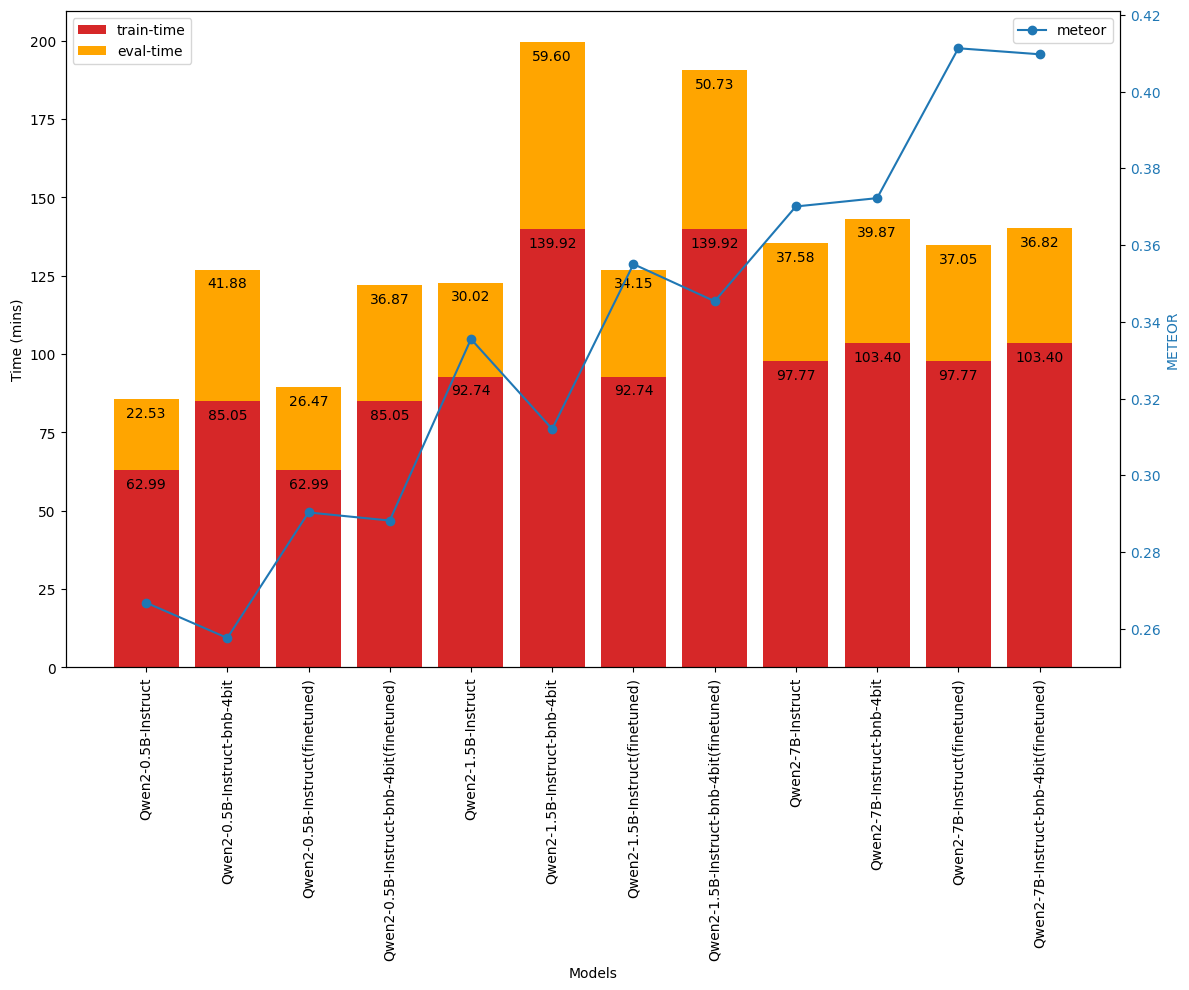

In [20]:
# Adjusted code to put "train-time" bars in red at the bottom

fig, ax1 = plt.subplots(figsize=(12, 10))

color_train = "tab:red"
color_eval = "orange"
ax1.set_xlabel("Models")
ax1.set_ylabel("Time (mins)")
ax1.set_xticks(range(len(perf_df["model"])))  # Set x-ticks positions
ax1.set_xticklabels(perf_df["model"], rotation=90)

# Plot "train-time" first so it's at the bottom
ax1.bar(
    perf_df["model"], perf_df["train-time(mins)"], color=color_train, label="train-time"
)

# Then, plot "eval-time" on top of "train-time"
ax1.bar(
    perf_df["model"],
    perf_df["eval-time(mins)"],
    bottom=perf_df["train-time(mins)"],
    color=color_eval,
    label="eval-time",
)

ax1.tick_params(axis="y")
ax1.legend(loc="upper left")

ax2 = ax1.twinx()
color_meteor = "tab:blue"
ax2.set_ylabel("METEOR", color=color_meteor)
ax2.plot(
    perf_df["model"], perf_df["meteor"], color=color_meteor, marker="o", label="meteor"
)
ax2.tick_params(axis="y", labelcolor=color_meteor)
ax2.legend(loc="upper right")

# Show numbers in bars
for p in ax1.patches:
    height = p.get_height()
    if height == 0:  # Skip bars with height 0
        continue
    ax1.annotate(
        f"{height:.2f}",
        (p.get_x() + p.get_width() / 2.0, p.get_y() + height),
        ha="center",
        va="center",
        xytext=(0, -10),
        textcoords="offset points",
    )

ax2.set_ylim(ax2.get_ylim()[0], 0.421)

fig.tight_layout()
plt.show()

## Experiment 2

In [21]:
import pandas as pd

df = pd.read_csv("results/experiment-2-results.csv")
df.head(2)

,chinese,english,unsloth/Qwen2-0.5B-Instruct,unsloth/Qwen2-0.5B-Instruct(finetuned),unsloth/Qwen2-1.5B-Instruct,unsloth/Qwen2-1.5B-Instruct(finetuned),unsloth/Qwen2-7B-Instruct,unsloth/Qwen2-7B-Instruct(finetuned),unsloth/mistral-7b-instruct-v0.3,unsloth/mistral-7b-instruct-v0.3(finetuned),gradientai/Llama-3-8B-Instruct-Gradient-1048k,gradientai/Llama-3-8B-Instruct-Gradient-1048k(finetuned)
0,老耿端起枪，眯缝起一只三角眼，一搂扳机响了枪，冰雹般的金麻雀劈哩啪啦往下落，铁砂子在柳枝间飞...,"Old Geng picked up his shotgun, squinted, and ...","Old Tang held his gun, squinting his eyes with...",Old Geng lifted his rifle and narrowed his eye...,"Old Geng took up his gun, squinted one of its ...","Old Geng raised the rifle, squeezed one tiny t...","Old Aigang raised his rifle, squinting one of ...",Old Geng raised his rifle and squinted into th...,"Old Geng raised his gun, squinted through one ...","Old Geng raised his rifle, squinted through on...","Geng Da initiates firing, squinting to form a ...","Old Geng aimed, blinked once, and fired. His s..."
1,次日天未明时，刘老老便起来梳洗了， 又将板儿教了几句话； 五六岁的孩子，听见带了他进城逛去，...,Next day Grannie Liu was up before dawn. As so...,"The next morning when it was still dark, Liu G...",It was still not light when this little update...,"By the time the next day dawned, Liu Lao got u...","Having been woken just before daybreak, Granni...","The next morning, before dawn, Old Liu rose to...",First thing next morning Grannie Liu rose befo...,"The next day, when it was still dark, Liu Lao ...","Next morning, long before daybreak, Grannie Li...","The next day, when it was still dark, Liu Lao ...","As soon as it was daylight, Grannie Liu got up..."


In [22]:
metrics_df = get_metrics(df)
metrics_df.describe()

unsloth/Qwen2-0.5B-Instruct: {'accuracy': 0.0, 'correct_ids': [], 'meteor': 0.26682092609395136, 'bleu_scores': {'bleu': 0.050004191193532964, 'precisions': [0.32555012625848556, 0.07871253405994551, 0.025538396146217057, 0.009553670232386574], 'brevity_penalty': 1.0, 'length_ratio': 1.010036435905929, 'translation_length': 30493, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.3205878045442848, 'rouge2': 0.09527675162749044, 'rougeL': 0.2641251903178907, 'rougeLsum': 0.263765402135964}}
unsloth/Qwen2-0.5B-Instruct(finetuned): {'accuracy': 0.00088261253309797, 'correct_ids': [147], 'meteor': 0.29032409482315213, 'bleu_scores': {'bleu': 0.06508609399238363, 'precisions': [0.3407579117113485, 0.09377291935878182, 0.03598822203642444, 0.01652015762352228], 'brevity_penalty': 0.9858565320713017, 'length_ratio': 0.9859556144418682, 'translation_length': 29766, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.3232705920013387, 'rouge2': 0.11265921669735668, 'rougeL': 0.26707

,accuracy,meteor,bleu_1,rouge_l
count,10.000000,10.000000,10.000000,10.000000
mean,0.002913,0.345003,0.095269,0.327718
std,0.003814,0.046595,0.028342,0.039461
min,0.000000,0.266821,0.050004,0.264125
25%,0.000883,0.320265,0.079469,0.315965
50%,0.001324,0.345280,0.091178,0.325790
75%,0.003310,0.379847,0.117114,0.357942
max,0.012357,0.411287,0.138238,0.379935


In [23]:
metrics_df

,model,accuracy,meteor,bleu_1,rouge_l,all_metrics
0,unsloth/Qwen2-0.5B-Instruct,0.000000,0.266821,0.050004,0.264125,"{'accuracy': 0.0, 'correct_ids': [], 'meteor':..."
1,unsloth/Qwen2-0.5B-Instruct(finetuned),0.000883,0.290324,0.065086,0.267073,"{'accuracy': 0.00088261253309797, 'correct_ids..."
2,unsloth/Qwen2-1.5B-Instruct,0.001765,0.335521,0.082854,0.328343,"{'accuracy': 0.00176522506619594, 'correct_ids..."
3,unsloth/Qwen2-1.5B-Instruct(finetuned),0.002648,0.355038,0.097349,0.323237,"{'accuracy': 0.00264783759929391, 'correct_ids..."
4,unsloth/Qwen2-7B-Instruct,0.000883,0.370062,0.106828,0.359150,"{'accuracy': 0.00088261253309797, 'correct_ids..."
5,unsloth/Qwen2-7B-Instruct(finetuned),0.006178,0.411287,0.138238,0.379935,"{'accuracy': 0.00617828773168579, 'correct_ids..."
6,unsloth/mistral-7b-instruct-v0.3,0.000000,0.319634,0.078340,0.315294,"{'accuracy': 0.0, 'correct_ids': [], 'meteor':..."
7,unsloth/mistral-7b-instruct-v0.3(finetuned),0.012357,0.396070,0.128440,0.367726,"{'accuracy': 0.01235657546337158, 'correct_ids..."
8,gradientai/Llama-3-8B-Instruct-Gradient-1048k,0.000883,0.322159,0.085008,0.317977,"{'accuracy': 0.00088261253309797, 'correct_ids..."
9,gradientai/Llama-3-8B-Instruct-Gradient-1048k(...,0.003530,0.383109,0.120543,0.354319,"{'accuracy': 0.00353045013239188, 'correct_ids..."


/Users/inflaton/code/engd/projects/novel-translation/llm_translation/translation_utils.py:124: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  barplot.set_xticklabels(["METEOR", "BLEU-1", "ROUGE-L"])


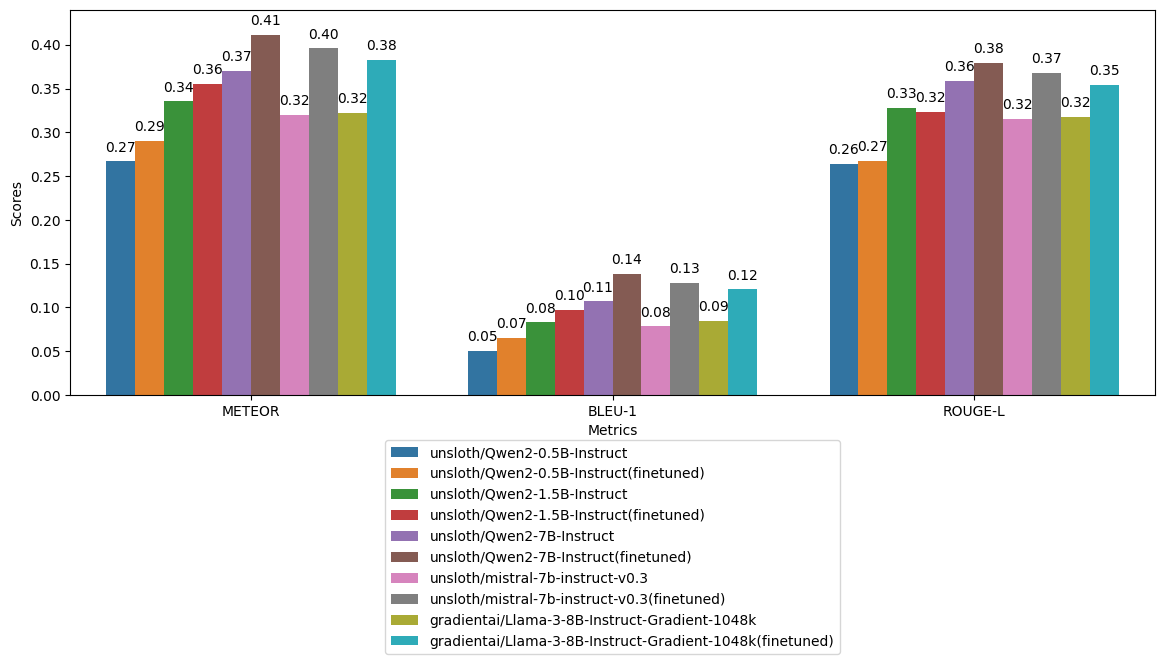

In [24]:
plot_metrics(metrics_df)